In [1]:
import requests
import os
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
socrata_domain = "data.cityofnewyork.us"
s_token= "owhOVQVkxAIoOnckQs4UrHcVo"
client = Socrata(socrata_domain, s_token)
results=client.get("uvbq-3m68",limit=50000,where="issue_date like'%/2018'")

In [3]:
df=pd.DataFrame.from_records(results)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
amount_due             50000 non-null object
county                 49549 non-null object
fine_amount            50000 non-null object
interest_amount        50000 non-null object
issue_date             50000 non-null object
issuing_agency         49999 non-null object
judgment_entry_date    4447 non-null object
license_type           50000 non-null object
payment_amount         50000 non-null object
penalty_amount         50000 non-null object
plate                  50000 non-null object
precinct               50000 non-null object
reduction_amount       50000 non-null object
state                  50000 non-null object
summons_image          50000 non-null object
summons_number         50000 non-null object
violation              49997 non-null object
violation_status       16547 non-null object
violation_time         49999 non-null object
dtypes: object(19)
memory usage: 7.2+

In [4]:

df["payment_amount"]=df.payment_amount.apply(pd.to_numeric)
df["reduction_amount"]=df.payment_amount.apply(pd.to_numeric)
df["amount_due"]=df.amount_due.apply(pd.to_numeric)
df["fine_amount"]=df.amount_due.apply(pd.to_numeric)
df["interest_amount"]=df.amount_due.apply(pd.to_numeric)
df["penalty_amount"]=df.amount_due.apply(pd.to_numeric)


In [5]:
df_precinct=df.groupby(["precinct"])["summons_number"].count()


In [88]:
coord=pd.read_excel("Coord_Precinct.xlsx",converters={"Code":str})
coord=coord.rename(columns={"Code":"precinct"})
coord.tail()

,precinct,Lat,lon
72,115,40.783624,-73.868629
73,120,40.619016,-74.066657
74,121,40.641868,-74.168204
75,122,40.537972,-74.132038
76,123,40.502112,-74.229455


In [89]:
df_Pr=pd.merge(df,coord,on="precinct")

In [90]:
dfCount=df_Pr.groupby(["precinct"])["summons_number"].count()


In [92]:
Coordinate=pd.merge(coord,dfCount,on="precinct")

In [93]:
Coordinate

,precinct,Lat,lon,summons_number
0,001,40.704679,-74.017634,8951
1,005,40.722934,-73.988639,3674
2,006,40.738552,-73.999684,5169
3,007,40.718963,-73.973454,2606
4,009,40.726723,-73.971609,3953
5,010,40.762850,-74.001386,5189
6,013,40.743882,-73.981560,8896
7,014,40.753367,-73.974648,14718
8,017,40.746604,-73.964212,6435
9,018,40.773180,-73.993937,15307


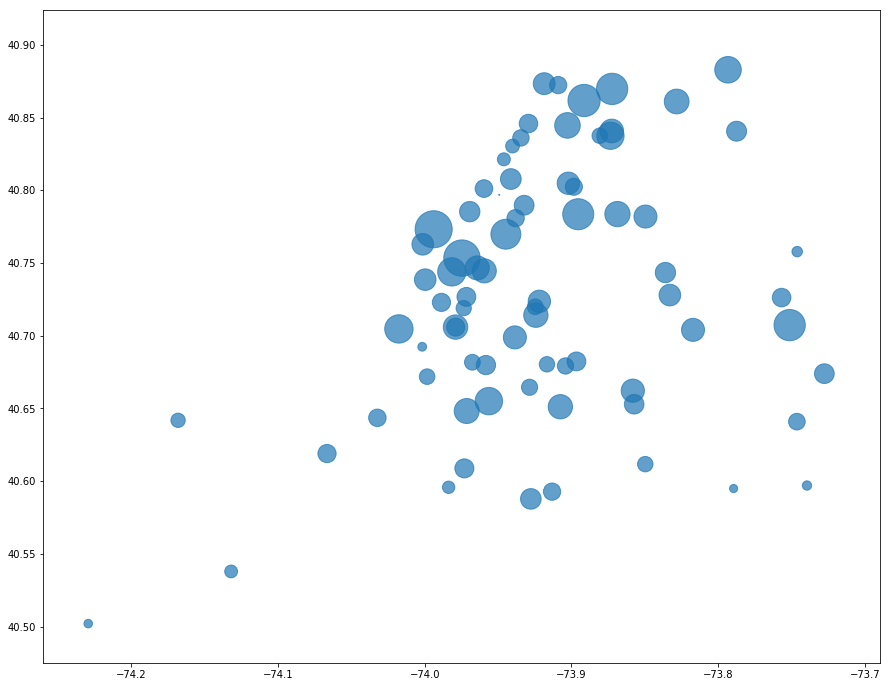

In [97]:
plt.figure(figsize=(15,12))
plt.scatter(x=Coordinate["lon"], y=Coordinate["Lat"], s=Coordinate["summons_number"]*0.09,
            alpha=0.7)